# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО:

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import scipy.stats as sps
import pandas as pd

from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

In [29]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

In [30]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


In [31]:
type(mnist.data)

numpy.ndarray

Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [32]:
mnist.data[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [33]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [34]:
from sklearn.model_selection import train_test_split
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

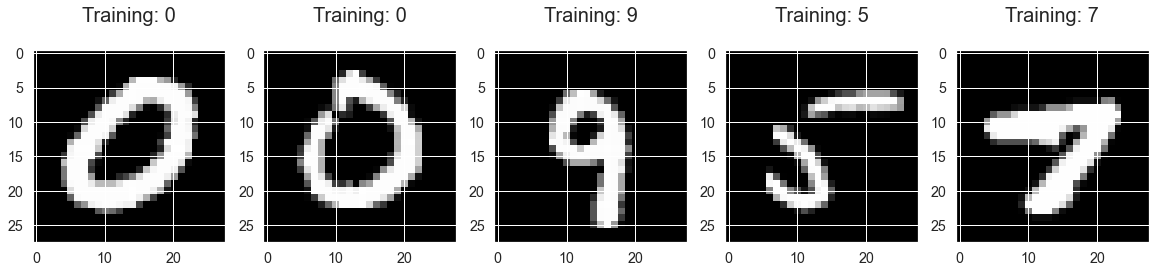

In [9]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [10]:
%%time
from sklearn.linear_model import Ridge
reg1 = linear_model.Ridge(alpha=.5)
reg1.fit(X, y)

Wall time: 8.43 s


Ridge(alpha=0.5)

In [69]:
%%time
from sklearn.linear_model import Lasso
reg = linear_model.Lasso(alpha=.5)
reg.fit(X, y)

Wall time: 19.6 s


Lasso(alpha=0.5)

In [73]:
%%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="l1",
    solver="liblinear")
clf.fit(X, y)

Wall time: 2min 46s


LogisticRegression(penalty='l1', solver='liblinear')

_Видно, что дольше всего обучалась модель с логистической регрессией(вполне возможно из-за того, что она использует регуляризацию, да и сама модель сложнее обычных МНК со штрафом)._

**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [12]:
from tqdm import tqdm
#X_train, X_test, y_train, y_test

In [10]:
from sklearn import neighbors

n_neighbors = 10

kNN_model = neighbors.KNeighborsClassifier(n_neighbors)
kNN_model.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(max_depth=2, random_state=0)
forest_model.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

grad_model = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0)
grad_model.fit(X, y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=10,
                           random_state=0)

**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

_Поскольку метрика Accuracy учитывает отношение правильно предсказанных цифр ко всем цифрам, то её обоснованно использовать в данном случае (предполагаем, что у нас равномерно распределены данные о цифрах, то есть примерно одинаковое количество цифр во всех случаях)._

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [13]:
from sklearn import metrics

Для метода случайных деревьев:

In [14]:
from sklearn.metrics import classification_report
acc = metrics.accuracy_score(y, forest_model.predict(X))
print(acc)

0.6287714285714285


Градиентный бустинг:

In [15]:
acc = metrics.accuracy_score(y, grad_model.predict(X))
print(acc)

0.7137857142857142


Для kNN возникла проблема с вычислением метрики(зависает при подсчёте)

In [ ]:
acc = metrics.accuracy_score(y, kNN_model.predict(X))
print(acc)

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix_forest = confusion_matrix(y, forest_model.predict(X))
conf_matrix_grad = confusion_matrix(y, grad_model.predict(X))

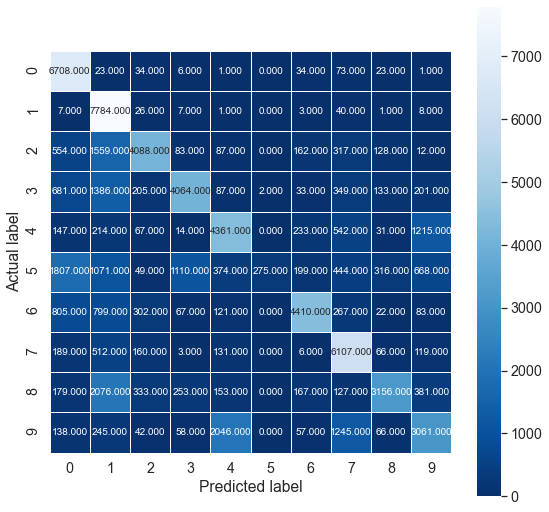

In [18]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix_forest, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

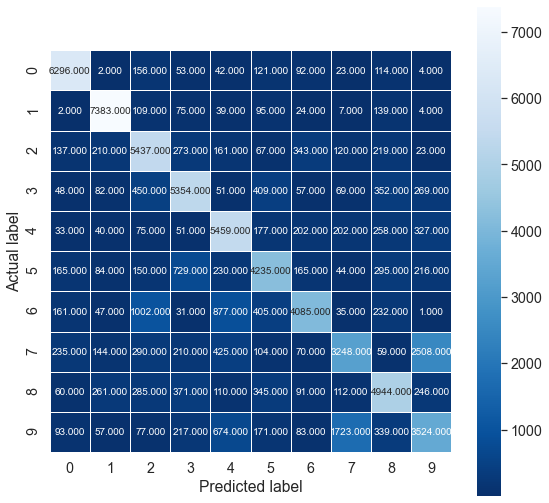

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix_grad, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Понижаем размерность

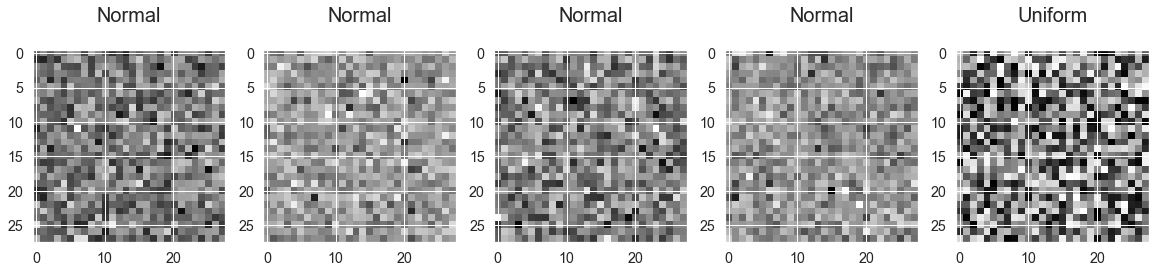

In [20]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [ ]:
from sklearn.manifold import TSNE
tsne_representation = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_train[:2000])

In [ ]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train[:2000]

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [38]:
from sklearn.decomposition import PCA
pca_representation = PCA(n_components=2).fit(X_train[:2000])

In [ ]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [100]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,-45.424889,4.850417,8
1,54.796669,-29.227238,7
2,1.260736,-34.056580,6
3,-19.073374,2.817944,5
4,30.453205,-1.438360,4


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [ ]:
from sklearn.cluster import #ваш код здесь и далее

dbscan_repr = #предсказания меток dbscanом

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

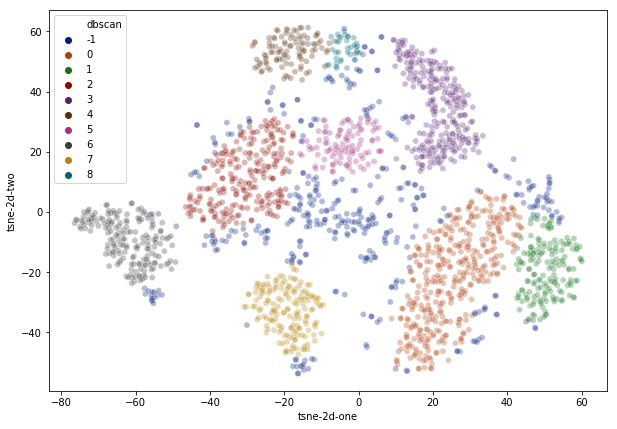

In [543]:
tsne_repr["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [545]:
#ваш код, графики и выводы здесь

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [546]:
#ваш код здесь

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [ ]:
#ваш код здесь